# NUMPY NEURAL NETWORK CODE

## Imports
Importing numpy, pandas, and matplotlib.
1. Numpy: For array and matrix operations while defining neural network layers
2. Pandas: For dataframe operations
3. Matplotlib: For visualizations

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [187]:
# loading df_train and df_test from kaggle 'mnist-in-csv dataset'
df_train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
df_test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')


In [188]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [189]:
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
#transposing for ease in matrix operations so every row is a column now
df_train = df_train.T
df_test = df_test.T

In [191]:
df_train.iloc[1:]

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
1x1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1x2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1x3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1x4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1x5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28x24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28x25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28x26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28x27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split data into training and testing data with labels separated (X and Y) 


In [192]:
# training dataset
X_train = df_train.iloc[1:]
y_train = df_train.iloc[0]

#testing dataset
X_test = df_test.iloc[1:]
y_test = df_test.iloc[0]

In [193]:
# normalizing training dataset based on pixel values
X_train = X_train = X_train / 255.

In [194]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1x2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1x3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1x4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1x5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28x24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28x25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28x26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28x27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

## Convert to numpy arrays for matrix operations

In [196]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [197]:
X_train[0], y_train[0]

(array([0., 0., 0., ..., 0., 0., 0.]), 5)

## Define functions for neural network

In [227]:
def init_params():
    # initializing weights and biases randomly for a starting point
    W1 = np.random.rand(10,784)* np.sqrt(1/784)
    b1 = np.random.rand(10,1)
    W2 = np.random.rand(10,10)* np.sqrt(1/10)
    b2 = np.random.rand(10,1)
    return W1, b1, W2, b2

def ReLU(Z):
    # applying rectified linear unit as the activation function on hidden layers
    return np.maximum(Z,0)

# def softmax(Z):
#     # applying softmax function to convert probabilities to predicted values in output layer
#     # print("Applying softmax")
#     A = np.exp(Z) / sum(np.exp(Z))
#     return A

def stable_softmax(Z):
    # stabilized softmax by subtracting the maximum value of inputs to prevent overflow
    Z = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    
def forward_prop(X_train, W1, b1, W2, b2):
    # forward propagation
   
    # hidden layer 1
    Z1 = W1.dot(X_train) + b1
    # applying activation function
    A1 = ReLU(Z1)

    #output layer
    Z2 = W2.dot(A1) + b2
    # applying softmax
    A2 = stable_softmax(Z2)
    return Z1, A1, Z2, A2



def one_hot_encode(y):
    # one hot encoding ==> whichever number we want to encode, we take that index and set it as 1 everything else as zero
    # eg. if x = 2, then return [0,0,1,0,0,0,0,0,0,0]
    array = np.zeros(10, dtype = int)
    array[y] = 1
    array = array.T
    return array

def dReLU(Z):
    # derivative of relu
    return Z > 0
    
def back_prop(Z1, A1, Z2, A2, W2, X_train, y_train):
    # backpropagation
    m = len(X_train)
    y = np.zeros((10, len(y_train)))

    # one hot encoding all the labels
    for i in range(len(y_train)):
        y[y_train[i], i] = 1
    
    # predicted labels vs actual labels: error
    dZ2 = A2 - y
    # derivative of weight of output layer
    dW2 = (1/m)*(dZ2).dot(A1.T)
    # derivative of bias of output layer
    db2 = (1/m)*np.sum(dZ2)
    # derivative of hidden layer
    dZ1 = W2.T.dot(dZ2)*(dReLU(Z2))
    # derivative of weight of hidden layer
    dW1 = (1/m)*dZ1.dot(X_train.T)
    # derivative of bias of hidden layer
    db1 = (1/m)*np.sum(dZ1)
    return dZ2, dW2, db2, dZ1, dW1, db1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    # updated weights and biases
    W1 = W1 - lr*dW1
    b1 = b1 - lr*db1
    W2 = W2 - lr*dW2
    b2 = b2 - lr*db2
    return W1, b1, W2, b2

In [228]:
def get_predictions(A2):
    # get predictions from output layer
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # accuracy calculation
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X_train, y_train, iters, lr):
    # one iteration of forward and backward prop followed by updation of weights and biases
    W1, b1, W2, b2 = init_params()
    try:
        for i in range(iters):
            # print("ITER:", i)
            Z1, A1, Z2, A2 = forward_prop(X_train, W1, b1, W2, b2)
            dZ2, dW2, db2, dZ1, dW1, db1 = back_prop(Z1, A1, Z2, A2, W2, X_train, y_train)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
            if i % 50 == 0:
                print("Iteration: ", i)
                predictions = get_predictions(A2)
                print("Accuracy:", get_accuracy(predictions, y_train))
        return W1, b1, W2, b2
    except Exception as e:
        print("Exited early due to error:", e)


## Hyperparameter Tuning

In [241]:
# going through the neural networks with iterations = 500 and learning rate = 0.001 
# Training accuracy = 86.66%

# Experiments:
# iterations = 100 with different learning rates: 9% < training accuracy < 13% 
# iterations = 500 with learning rate = 1: training accuracy stagnant at 9.75%
# iterations = 500 with learning rate = 0.5: 9% < training accuracy < 11%
# iterations = 500 with learning rate = 0.1: 10% < training accuracy < 17%
# iterations = 500 with learning rate = 0.01: 10% < training accuracy < 21%
# iterations = 500 with learning rate = 0.0001: 9% < training accuracy < 47.9%

W1, b1, W2, b2 = gradient_descent(X_train, y_train, 500, 0.001)

Iteration:  0
Accuracy: 0.09915
Iteration:  50
Accuracy: 0.5707833333333333
Iteration:  100
Accuracy: 0.73775
Iteration:  150
Accuracy: 0.8011833333333334
Iteration:  200
Accuracy: 0.8330333333333333
Iteration:  250
Accuracy: 0.8491833333333333
Iteration:  300
Accuracy: 0.8577833333333333
Iteration:  350
Accuracy: 0.8630166666666667
Iteration:  400
Accuracy: 0.8652833333333333
Iteration:  450
Accuracy: 0.8660666666666667


## Testing on test set

In [242]:

def make_predictions(X, W1, b1, W2, b2):
    # go through neural network with test input and predict value
    Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    # print image and actual + predicted label
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image)
    plt.show()

Prediction:  [3]
Label:  5


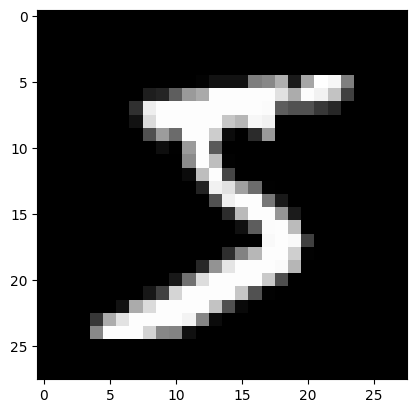

In [243]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [0]
Label:  0


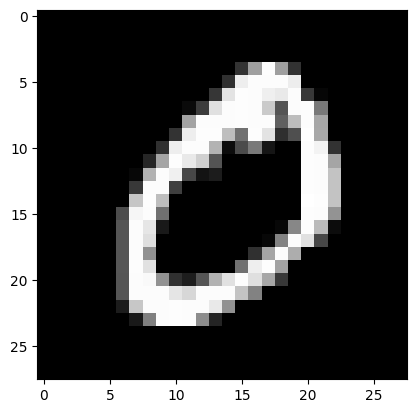

In [244]:
test_prediction(1, W1, b1, W2, b2)

In [245]:
# Testing accuracy == 86.31%

test_pred = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_pred, y_test)

0.8631